In [19]:
import pandas as pd
# from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
# from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [20]:
# Load our csv as a pandas dataframe
btc = pd.read_csv("../../Python/side-projects/btc-price-tracker-enhanced/BTCUSDT-D.csv")

In [21]:
# Create our targets for our dataset
direction = []
for row in range(len(btc)):
    if btc["close"][row] > btc["open"][row]:
        direction.append(0)
    else:
        direction.append(1)

# 0 = long, 1 = short
btc["targets"] = direction

def class_name(label: int) -> str:
    if label == 0:
        return "Long"
    else:
        return "short"

In [22]:
# Function to calculate the difference from one day to the next of a given column of data
def percent_change(dataframe, column_name) -> list:

    variable = dataframe[column_name]
    change = [0]
    
    for row in range(len(dataframe)):

        if row == 0:
            continue

        difference = round((variable[row] - variable[row - 1]) / variable[row-1], 6)
        change.append(difference)
        # if difference > 0:
        #     change.append(1)
        # else:
        #     change.append(0)
        
    return change

In [23]:
# Function to calculate the difference from one day to the next of a given column of data
def hl_change(dataframe, column_name) -> list:

    variable = dataframe[column_name]
    change = [0, 0]
    
    for row in range(len(dataframe)):

        if row == 0 or row == 1:
            continue

        difference = round((variable[row-1] - variable[row - 2]) / variable[row-2], 6)
        change.append(difference)
        # if difference > 0:
        #     change.append(1)
        # else:
        #     change.append(0)
        
    return change

In [24]:
def binarize_change():

    change = []
    
    for row in range(len(btc)):
        if btc["daily_change"][row] > 0:
            change.append(1)
        else:
            change.append(0)
    return change

In [25]:
def get_average(dataframe, column, length):
    moving_average = []
    length = length
    
    rolling_average = dataframe[column].rolling(length)
    
    for entry in rolling_average:
        total = 0
        for line in entry:
            total += line
        avg = total / len(entry)
        moving_average.append(round(avg, 6))

    return moving_average

In [26]:
day = []

for row in range(len(btc)):
    prefix = btc["date"][row].split("-")[0]
    if prefix == "Mon":
        day.append(0)
    elif prefix == "Tue":
        day.append(0.1)
    elif prefix == "Wed":
        day.append(0.2)
    elif prefix == "Thu":
        day.append(0.3)
    elif prefix == "Fri":
        day.append(0.4)
    elif prefix == "Sat":
        day.append(0.5)
    else:
        day.append(0.6)

# Monday = 0, Tuesday = 0.1, etc
btc["day"] = day

In [41]:
btc["daily_change"] = percent_change(btc, "open")
btc["high_change"] = hl_change(btc, "high")
btc["low_change"] = hl_change(btc, "low")
btc["moving_avg"] = get_average(btc, "daily_change", 7)
btc["longer_average"] = get_average(btc, "daily_change", 14)

for i in range(1,50):
    btc[f"moving_average_{str(i)}"] = (get_average(btc, "daily_change", i))


a = btc["moving_avg"]
b = btc["longer_average"]
price = btc["daily_change"]
location = []

for row in range(len(btc)):

    if a[row] > b[row] and price[row] > a[row] and price[row] > b[row]:
        location.append(0.1)
    elif a[row] > b[row] and price[row] > a[row] and price[row] < b[row]:
        location.append(0.2)
    elif a[row] > b[row] and price[row] < a[row] and price[row] > b[row]:
        location.append(0.3)
    elif a[row] > b[row] and price[row] < a[row] and price[row] < b[row]:
        location.append(0.4)
    elif a[row] < b[row] and price[row] > a[row] and price[row] > b[row]:
        location.append(0.5)
    elif a[row] < b[row] and price[row] > a[row] and price[row] < b[row]:
        location.append(0.6)
    elif a[row] < b[row] and price[row] < a[row] and price[row] > b[row]:
        location.append(0.7)
    elif a[row] < b[row] and price[row] < a[row] and price[row] < b[row]:
        location.append(0.8)
    else:
        location.append(0)

btc["location"] = location

In [42]:
btc["binarized_change"] = binarize_change()
btc.head()

,date,time,open,high,low,close,volume,targets,day,daily_change,...,moving_average_40,moving_average_41,moving_average_42,moving_average_43,moving_average_44,moving_average_45,moving_average_46,moving_average_47,moving_average_48,moving_average_49
0,Thu-23-Dec-21,00:00:00,48610,51432,48030,50794,2246508966,0,0.3,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Fri-24-Dec-21,00:00:00,50794,51980,50402,50785,1837726929,1,0.4,0.044929,...,0.022464,0.022464,0.022464,0.022464,0.022464,0.022464,0.022464,0.022464,0.022464,0.022464
2,Sat-25-Dec-21,00:00:00,50785,51149,50100,50406,1147589024,1,0.5,-0.000177,...,0.014917,0.014917,0.014917,0.014917,0.014917,0.014917,0.014917,0.014917,0.014917,0.014917
3,Sun-26-Dec-21,00:00:00,50406,51294,49283,50763,1676805639,0,0.6,-0.007463,...,0.009322,0.009322,0.009322,0.009322,0.009322,0.009322,0.009322,0.009322,0.009322,0.009322
4,Mon-27-Dec-21,00:00:00,50763,52119,50464,50706,1765283382,1,0.0,0.007082,...,0.008874,0.008874,0.008874,0.008874,0.008874,0.008874,0.008874,0.008874,0.008874,0.008874


In [43]:
btc.columns

Index(['date', 'time', 'open', 'high', 'low', 'close', 'volume', 'targets',
       'day', 'daily_change', 'high_change', 'low_change', 'moving_avg',
       'longer_average', 'location', 'binarized_change', 'moving_average_1',
       'moving_average_2', 'moving_average_3', 'moving_average_4',
       'moving_average_5', 'moving_average_6', 'moving_average_7',
       'moving_average_8', 'moving_average_9', 'moving_average_10',
       'moving_average_11', 'moving_average_12', 'moving_average_13',
       'moving_average_14', 'moving_average_15', 'moving_average_16',
       'moving_average_17', 'moving_average_18', 'moving_average_19',
       'moving_average_20', 'moving_average_21', 'moving_average_22',
       'moving_average_23', 'moving_average_24', 'moving_average_25',
       'moving_average_26', 'moving_average_27', 'moving_average_28',
       'moving_average_29', 'moving_average_30', 'moving_average_31',
       'moving_average_32', 'moving_average_33', 'moving_average_34',
       'movi

In [44]:

features = btc.filter(['targets',
       'day', 'daily_change', 'high_change', 'low_change', 'location', 'binarized_change', 'moving_average_1',
       'moving_average_2', 'moving_average_3', 'moving_average_4',
       'moving_average_5', 'moving_average_6', 'moving_average_7',
       'moving_average_8', 'moving_average_9', 'moving_average_10',
       'moving_average_11', 'moving_average_12', 'moving_average_13',
       'moving_average_14', 'moving_average_15', 'moving_average_16',
       'moving_average_17', 'moving_average_18', 'moving_average_19',
       'moving_average_20', 'moving_average_21', 'moving_average_22',
       'moving_average_23', 'moving_average_24', 'moving_average_25',
       'moving_average_26', 'moving_average_27', 'moving_average_28',
       'moving_average_29', 'moving_average_30', 'moving_average_31',
       'moving_average_32', 'moving_average_33', 'moving_average_34',
       'moving_average_35', 'moving_average_36', 'moving_average_37',
       'moving_average_38', 'moving_average_39', 'moving_average_40',
       'moving_average_41', 'moving_average_42', 'moving_average_43',
       'moving_average_44', 'moving_average_45', 'moving_average_46',
       'moving_average_47', 'moving_average_48', 'moving_average_49']) #,"longer_average", "moving_avg"
# features = btc.drop(["date", "time", "open", "high", "low", "longer_average", "moving_avg"], axis = 1)
X_train_full, X_test, y_train_full, y_test = train_test_split(features.drop(["targets"], axis = 1), features["targets"])

input_number = X_train_full.shape[1]
input_number

55

In [45]:
X_val, X_train = X_train_full[:100], X_train_full[100:]
y_val, y_train = y_train_full[:100], y_train_full[100:]

X_train.shape

(653, 55)

In [46]:
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=(input_number,)),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 300)               16800     
                                                                 
 dense_9 (Dense)             (None, 100)               30100     
                                                                 
 dense_10 (Dense)            (None, 300)               30300     
                                                                 
 dense_11 (Dense)            (None, 2)                 602       
                                                                 
Total params: 77,802
Trainable params: 77,802
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

#### Train

In [48]:
history = model.fit(X_train, y_train, epochs = 500, validation_data=(X_val, y_val))

Epoch 1/500
21/21 [==============================] - 1s 9ms/step - loss: 0.6943 - accuracy: 0.4701 - val_loss: 0.6944 - val_accuracy: 0.4600
Epoch 2/500
21/21 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4747 - val_loss: 0.6944 - val_accuracy: 0.4800
Epoch 3/500
21/21 [==============================] - 0s 13ms/step - loss: 0.6938 - accuracy: 0.4686 - val_loss: 0.6940 - val_accuracy: 0.4800
Epoch 4/500
21/21 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.4916 - val_loss: 0.6936 - val_accuracy: 0.4900
Epoch 5/500
21/21 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.5100 - val_loss: 0.6935 - val_accuracy: 0.5200
Epoch 6/500
21/21 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.4747 - val_loss: 0.6935 - val_accuracy: 0.5500
Epoch 7/500
21/21 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6936 - val_accuracy: 0.5400
Epoch 8/500


#### Plot

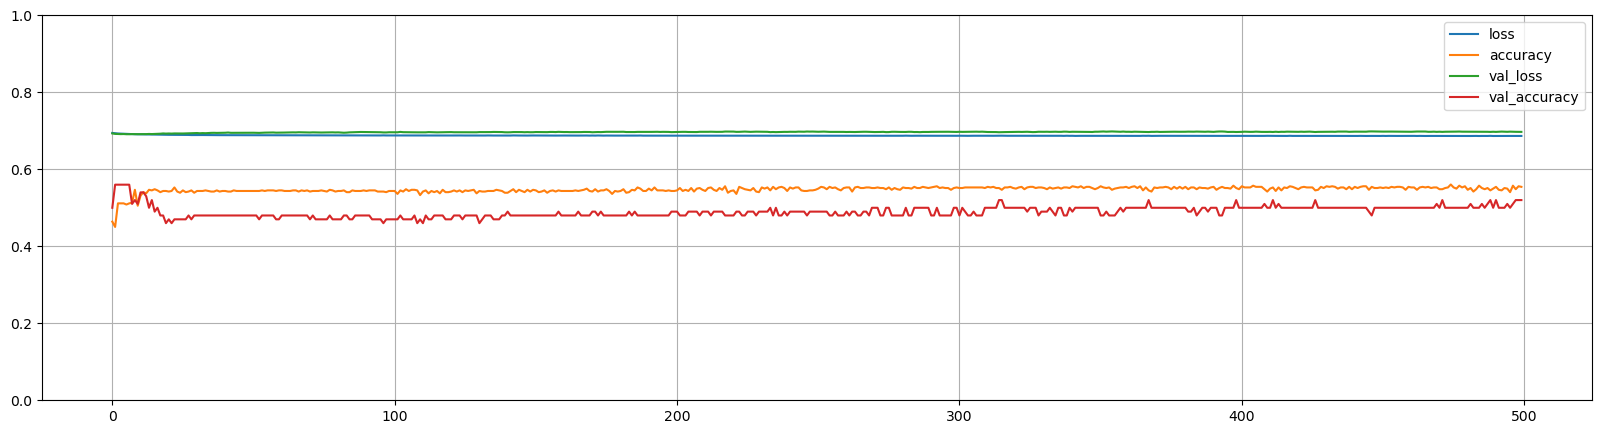

In [34]:
pd.DataFrame(history.history).plot(figsize=(20, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [35]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5339


[0.6931042671203613, 0.5338645577430725]

In [36]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 91ms/step


array([[0.53, 0.47],
       [0.47, 0.53],
       [0.53, 0.47]], dtype=float32)

In [37]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 26ms/step


array([0, 1, 0])

In [38]:
print(class_name(y_pred[0]), class_name(y_pred[1]), class_name(y_pred[2]))

Long short Long


In [39]:
y_new = y_test[:3]
y_new

505    1
256    1
925    1
Name: targets, dtype: int64

In [40]:
# encode our targets
lb = LabelEncoder()
targets = lb.fit_transform(btc["targets"])

NameError: name 'LabelEncoder' is not defined

In [21]:
# Creaate a list of our feautres we want to use and split our dataset

features = btc.filter(["daily_change"])

X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state = 42)

# Convert to an array of the numpy variety
X_train = X_train.values
X_test = X_test.values

In [23]:
# Train a neuronboi
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100), random_state = 42)

In [25]:
# get the boi score
score = cross_val_score(mlp, X_train, y_train, scoring = "accuracy")
score.mean()

0.49669757174392937